## Abrindo arquivos json e sorteando nomes

In [1]:
import pandas as pd

In [2]:
nomes_feminio = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=f')
nomes_masculino = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=m')

In [3]:
nomes_feminio

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
5,JULIANA,0,562589,6,F
6,MARCIA,0,551855,7,F
7,FERNANDA,0,531607,8,F
8,PATRICIA,0,529446,9,F
9,ALINE,0,509869,10,F


In [4]:
nomes_masculino

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
5,PAULO,0,1417907,6,M
6,PEDRO,0,1213557,7,M
7,LUCAS,0,1116818,8,M
8,LUIZ,0,1102927,9,M
9,MARCOS,0,1101126,10,M


#### Sorteando 5 nomes Feminios:

In [5]:
nomes_feminio.sample(5)

,nome,regiao,freq,rank,sexo
12,AMANDA,0,464624,13,F
14,JESSICA,0,456472,15,F
3,ANTONIA,0,588783,4,F
13,BRUNA,0,460770,14,F
6,MARCIA,0,551855,7,F


#### Sorteando 5 nomes masculinos:

In [6]:
nomes_masculino.sample(5)

,nome,regiao,freq,rank,sexo
15,BRUNO,0,663271,16,M
10,LUIS,0,931530,11,M
19,RODRIGO,0,598825,20,M
11,GABRIEL,0,922744,12,M
9,MARCOS,0,1101126,10,M


#### Quantidade de nomes em cada variavel:

In [7]:
len(nomes_feminio)

20

In [8]:
len(nomes_masculino)

20

In [9]:
nomes_feminio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nome    20 non-null     object
 1   regiao  20 non-null     int64 
 2   freq    20 non-null     int64 
 3   rank    20 non-null     int64 
 4   sexo    20 non-null     object
dtypes: int64(3), object(2)
memory usage: 928.0+ bytes


#### Armazenando os dois DataFrames de nomes em uma variavel:

In [10]:
frame = [nomes_feminio, nomes_masculino]

#### Juntando os dois Dataframes:
- somente o campo nome
- to_frame() -> salvando em um novo DataFrame
- sample(5) -> sorteando 5 nomes aleatorios

In [11]:
nomes = pd.concat(frame)['nome'].to_frame()

In [12]:
nomes.sample(5)

,nome
19,RODRIGO
18,VANESSA
18,RAIMUNDO
0,JOSE
10,LUIS


# Incluindo ID dos alunos

#### Importando a biblioteca numpy para gerar números aleatórios

In [13]:
import numpy as np

In [14]:
np.random.seed(123)

In [15]:
# Iserindo a coluna Id_aluno que será aleatoria:

nomes['Id_aluno'] = np.random.permutation(len(nomes)) + 1

In [16]:
# Criando uma coluna chamada Id:
nomes.columns.name = 'Id'

In [17]:
# Alterando o indice da coluna Id para quantidade de nomes em ordem crescente:
nomes.index = range(nomes.shape[0])

In [18]:
nomes.sample(5)

Id,nome,Id_aluno
8,PATRICIA,14
35,BRUNO,20
20,JOSE,26
31,GABRIEL,37
28,LUIZ,10


## Criando dois dominios de email:

In [19]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']

## Criando as colunas: dominio e email
- Criar no DataFrame nomes a coluna dominio, que vai receber np. aleatorio, e o método choice e sortear os dominios da variavels dominios ate o tamanho do DataFrame nomes

In [20]:
nomes['dominio'] = np.random.choice(dominios, len(nomes))

In [21]:
nomes.sample(10)

Id,nome,Id_aluno,dominio
34,MARCELO,23,@dominiodoemail.com.br
2,FRANCISCA,13,@servicodoemail.com
32,RAFAEL,33,@servicodoemail.com
9,ALINE,21,@servicodoemail.com
11,CAMILA,38,@dominiodoemail.com.br
23,FRANCISCO,36,@servicodoemail.com
37,FELIPE,35,@dominiodoemail.com.br
26,PEDRO,15,@dominiodoemail.com.br
14,JESSICA,19,@servicodoemail.com
39,RODRIGO,3,@servicodoemail.com


## Juntando os dominios com os nomes do alunos
- Criando a coluna email, que recebe a coluna nome, passando para string, concatenando com a coluna dominio, e passando toda a string para minusculo

In [22]:
nomes['email'] = nomes['nome'].str.cat(nomes['dominio']).str.lower()

In [23]:
nomes.sample(10)

Id,nome,Id_aluno,dominio,email
4,ADRIANA,6,@dominiodoemail.com.br,adriana@dominiodoemail.com.br
0,MARIA,7,@dominiodoemail.com.br,maria@dominiodoemail.com.br
33,DANIEL,34,@dominiodoemail.com.br,daniel@dominiodoemail.com.br
15,LETICIA,40,@servicodoemail.com,leticia@servicodoemail.com
11,CAMILA,38,@dominiodoemail.com.br,camila@dominiodoemail.com.br
24,CARLOS,30,@dominiodoemail.com.br,carlos@dominiodoemail.com.br
38,RAIMUNDO,29,@servicodoemail.com,raimundo@servicodoemail.com
21,JOAO,5,@servicodoemail.com,joao@servicodoemail.com
18,VANESSA,22,@servicodoemail.com,vanessa@servicodoemail.com
28,LUIZ,10,@servicodoemail.com,luiz@servicodoemail.com


# Criando a Tabela Cursos

#### Instalando duas bibliotecas:
- !pip3 install html5lib
- !pip3 install lxml

In [24]:
!pip3 install html5lib
!pip3 install lxml

#### Importando as duas bibliotecas

In [25]:
import html5lib

In [26]:
# Passando a url da lista de cursos para a variavel:
url = 'http://tabela-cursos.herokuapp.com/index.html'

In [27]:
# Atribuindo a leitura da url a uma variavel Lendo essa página html, ela retorna uma lista:
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [28]:
type(cursos)

list

#### Transformando cursos que é uma lista em um DataFrame:

In [29]:
cursos = cursos[0]

In [30]:
type(cursos)

pandas.core.frame.DataFrame

In [31]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


### Alterando o index dos cursos

In [32]:
cursos = cursos.rename(columns={'Nome do curso': 'Nome_do_curso'})
cursos

,Nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


### Criando um id dos cursos

In [33]:
cursos['id'] = cursos.index + 1

In [34]:
cursos

,Nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
5,PHP com MySql,6
6,.NET para web,7
7,Novas integrações com Java,8
8,TDD com Java,9
9,Código limpo com C#,10


### Colocando a coluna id no lugar da indice:

In [35]:
cursos = cursos.set_index('id')

In [36]:
cursos.head()

,Nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


## Matriculando os alunos nos cursos

In [37]:
nomes.sample(5)

Id,nome,Id_aluno,dominio,email
7,FERNANDA,2,@dominiodoemail.com.br,fernanda@dominiodoemail.com.br
32,RAFAEL,33,@servicodoemail.com,rafael@servicodoemail.com
31,GABRIEL,37,@servicodoemail.com,gabriel@servicodoemail.com
17,LUCIANA,32,@servicodoemail.com,luciana@servicodoemail.com
13,BRUNA,8,@servicodoemail.com,bruna@servicodoemail.com


#### Criaremos uma nova coluna nomes['matriculas'] que receberá a chamada de np.random.exponential(), uma função exponencial da biblioteca Numpy. Passaremos para ela o parâmetro size=total_alunos. Em seguida, usarmeos astype(int) de modo a definirmos o tipo dessa coluna como inteiro, e pediremos uma amostra do novo dataframe com nomes.sample(5).

#### Entretanto, tivemos matrículas com o valor mínimo 0, algo que não queremos no nosso projeto. Para ajustarmos isso, encobriremos a chamada de np.random.exponential() com a chamada da função np.ceil(), que retorna arredonda os valores para cima.

#### Também gostaríamos de aumentar o número de cursos nos quais os alunos e alunas estão matriculados. Pensando nisso, multiplicaremos o resultado do gerador de números randômicos por 1.5.

In [38]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=len(nomes)) * 1.5).astype(int)
nomes.sample(5)

Id,nome,Id_aluno,dominio,email,matriculas
26,PEDRO,15,@dominiodoemail.com.br,pedro@dominiodoemail.com.br,1
16,JULIA,4,@servicodoemail.com,julia@servicodoemail.com,1
8,PATRICIA,14,@dominiodoemail.com.br,patricia@dominiodoemail.com.br,1
2,FRANCISCA,13,@servicodoemail.com,francisca@servicodoemail.com,2
4,ADRIANA,6,@dominiodoemail.com.br,adriana@dominiodoemail.com.br,1


In [39]:
nomes['matriculas'].describe()

count    40.000000
mean      1.700000
std       0.966092
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       4.000000
Name: matriculas, dtype: float64

#### Fazendo um Describe na coluna 'matricula':
- Temos 40 registros
- Média ficou de 1.7 cursos por pessoa
- Desvio padrão de 0.96
- Temos no minimo 1 pessoa inscrita por curso
- Temos no máximo 4 cursos inscrito para uma pessoa 

### Visualizando essa distribuição de cursos no gráfico:

In [40]:
import seaborn as sns

<AxesSubplot:xlabel='matriculas', ylabel='Count'>

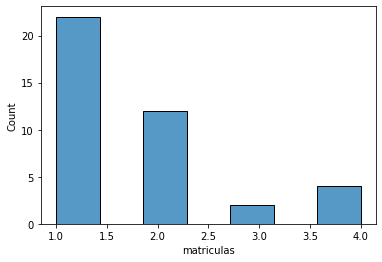

In [41]:
sns.histplot(nomes['matriculas'])

### Verificando quantos alunos tem por curso

In [42]:
nomes['matriculas'].value_counts()

1    22
2    12
4     4
3     2
Name: matriculas, dtype: int64

#### Traduzindo os dados acima:
- 22 alunos estão matriculados em 1 curso
- 12 alunos estão matriculados em 2 cursos
- 4 alunos estão matriculados em 4 cursos
- 3 alunos estão matriculados em 2 cursos

## Selecionando Cursos

In [43]:
nomes.sample(5)

Id,nome,Id_aluno,dominio,email,matriculas
11,CAMILA,38,@dominiodoemail.com.br,camila@dominiodoemail.com.br,1
26,PEDRO,15,@dominiodoemail.com.br,pedro@dominiodoemail.com.br,1
10,SANDRA,9,@servicodoemail.com,sandra@servicodoemail.com,2
31,GABRIEL,37,@servicodoemail.com,gabriel@servicodoemail.com,3
23,FRANCISCO,36,@servicodoemail.com,francisco@servicodoemail.com,2


#### Para fazermos essa distribuição, criaremos três variáveis. A primeira delas é total_matriculas, que será inicializada como um array vazio. Em seguida, criaremos uma variável x que receberá a chamada de np.random.rand(20, uma maneira de calcularmos randomicamente os 20 cursos que temos no dataframe. Por fim, teremos uma variável prob (de probabilidade) que receberá a divisão de x por sum(x) (a soma de x).

In [44]:
todas_matriculas = []
x = np.random.rand(20)
probabilidade = x / sum(x)

#### Depois de inicializarmos essas variáveis, a ideia é buscarmos em cada linha do dataframe o nome, o id_aluno e a quantidade de matriculas para então atribuirmos aos alunos a quantidade correta de cursos escolhidos aleatoriamente.

- Passaremos para a criação de um iterador for que buscará o index e a linha que iremos utilizar, a qual chamaremos de row. Esse iterador percorrerá o dataframe nomes com o auxílio da função iterrows(), que nos devolve cada linha do conjunto.
- A cada elemento encontrado, armazenaremos o id do aluno, conseguido com row.id_aluno, e a quantidade de matriculas, conseguida com row.matriculas.
- De posse dessas informações, precisamos decidir quantos cursos terão que ser atribuídos a cada aluno com base na sua quantidade de matrículas. Para isso, teremos um novo iterador for que buscará cada elemento (i) no intervalo range(matriculas) (de 0 até o valor de matriculas). Teremos então uma matrícula mat que receberá o id do aluno e o id do curso, que conseguiremos aleatoriamente utilizando a função np.random.choice(). Esta, por sua vez, receberá como parâmetros o índice de cursos (cursos.index e a variável de probabilidade que inicializamos anteriormente (p = prob).
- Prosseguiremos atribuindo ao array todas_matriculas, usando a função append(), as matrículas mat que estipulamos para o aluno.
- Agora que rodamos todos os nomes selecionando os IDs de curso para cada matrícula, poderemos criar o dataframe matriculas usando a função DataFrame() do Pandas. Ela receberá o conteúdo de todas_matriculas, que distribuiremos nas colunas id_aluno e id_curso. Por fim, chamaremos matriculas.head(5) para verificarmos as cinco primeiras entradas deste dataframe.

In [45]:
for index, row in nomes.iterrows():
    id = row.Id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = probabilidade)]
        todas_matriculas.append(mat)

In [46]:
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])
matriculas.head(5)

,id_aluno,id_curso
0,7,16
1,11,8
2,13,16
3,13,20
4,39,5


#### Como resultado, temos um dataframe com o qual conseguimos saber em quais cursos cada aluno se inscreveu. Por exemplo, sabemos que o aluno 235 se inscreveu nos cursos 15 e 4, e que o aluno 43 se inscreveu nos cursos 6, 4 e 10. Agrupando os dataframes cursosatriculas, conseguiremos inclusive saber quantos alunos estão matriculados em cada curso.

A partir do dataframe matriculas, chamaremos a função groupby() passando como parâmetro a coluna id_curso. Em seguida, chamaremos a função count() para contarmos as matrículas. Com a função join(), uniremos essa informação à tabela cursos, tomando como base a coluna nome_do_curso.

In [47]:
matriculas.groupby('id_curso').count().join(cursos['Nome_do_curso'])

,id_aluno,Nome_do_curso
id_curso,,
1,3,Lógica de programação
2,2,Java para Web
3,3,C# para Web
4,1,Ruby on Rails
5,1,Cursos de Python
6,4,PHP com MySql
7,7,.NET para web
8,4,Novas integrações com Java
9,6,TDD com Java


In [48]:
matriculas.groupby('id_curso').count().join(cursos['Nome_do_curso']).rename(columns={'id_aluno':'Quantidade_de_alunos'})

,Quantidade_de_alunos,Nome_do_curso
id_curso,,
1,3,Lógica de programação
2,2,Java para Web
3,3,C# para Web
4,1,Ruby on Rails
5,1,Cursos de Python
6,4,PHP com MySql
7,7,.NET para web
8,4,Novas integrações com Java
9,6,TDD com Java


## DataFrames criados até agora

In [49]:
nomes.sample(5)

Id,nome,Id_aluno,dominio,email,matriculas
27,LUCAS,1,@servicodoemail.com,lucas@servicodoemail.com,2
0,MARIA,7,@dominiodoemail.com.br,maria@dominiodoemail.com.br,1
32,RAFAEL,33,@servicodoemail.com,rafael@servicodoemail.com,2
39,RODRIGO,3,@servicodoemail.com,rodrigo@servicodoemail.com,3
18,VANESSA,22,@servicodoemail.com,vanessa@servicodoemail.com,1


In [50]:
cursos.head()

,Nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [51]:
matriculas.head()

,id_aluno,id_curso
0,7,16
1,11,8
2,13,16
3,13,20
4,39,5


In [52]:
# Agrupamento de todos os DataFrame's em uma variavel
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['Nome_do_curso']).rename(columns={'id_aluno':'Quantidade_de_alunos'})

In [53]:
matriculas_por_curso.head()

,Quantidade_de_alunos,Nome_do_curso
id_curso,,
1,3,Lógica de programação
2,2,Java para Web
3,3,C# para Web
4,1,Ruby on Rails
5,1,Cursos de Python


## Saida(exportar) em diferentes formatos

### 1° Formato CSV()

In [54]:
matriculas_por_curso.head()

,Quantidade_de_alunos,Nome_do_curso
id_curso,,
1,3,Lógica de programação
2,2,Java para Web
3,3,C# para Web
4,1,Ruby on Rails
5,1,Cursos de Python


In [55]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [56]:
pd.read_csv('matriculas_por_curso.csv')

,Quantidade_de_alunos,Nome_do_curso
0,3,Lógica de programação
1,2,Java para Web
2,3,C# para Web
3,1,Ruby on Rails
4,1,Cursos de Python
5,4,PHP com MySql
6,7,.NET para web
7,4,Novas integrações com Java
8,6,TDD com Java
9,7,Código limpo com C#


## 2° Formato json()

In [57]:
matriculas_json = matriculas_por_curso.to_json()

In [58]:
matriculas_json

'{"Quantidade_de_alunos":{"1":3,"2":2,"3":3,"4":1,"5":1,"6":4,"7":7,"8":4,"9":6,"10":7,"13":5,"14":1,"15":4,"16":3,"17":5,"18":5,"19":2,"20":5},"Nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

## 3° Formato html()

In [59]:
matriculas_html = matriculas_por_curso.to_html()

In [60]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Quantidade_de_alunos</th>
      <th>Nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>3</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>3</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>1</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>4</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>7</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>4</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>6</td>
      <td

# Criando o banco SQL

### Instalando a biblioteca sqlalchemy

In [61]:
!pip install sqlalchemy

### Importando a biblioteca

In [62]:
from sqlalchemy import create_engine, MetaData, Table, inspect

#### Feita a importação, é necessário criar a nossa engine com o caminho do banco de dados. Caso o nosso banco fosse do tipo MySQL ou Postgres, teríamos que instalar outra biblioteca para lê-lo. Como estamos usando o SQLite, que vem nativamente no Colab, não há essa necessidade.

Criaremos então uma variável engine que receberá a chamada de create_engine(), a função que gerará o motor do nosso banco de dados. Como parâmetro passaremos, entre aspas simples, sqlite:///:memory: - ou seja, a definição do banco que estamos utilizando e de que tal banco deverá ser salvo na memória local.

In [63]:
engine = create_engine('sqlite:///:memory:')

#### Criado o banco de dados, precisamos transformar o dataframe matriculas_por_curso no formato do banco, algo que é feito usando a função to_sql(). Essa função recebe inicialmente dois parâmetros: uma string representando o nome da tabela, no caso matriculas, e a nossa engine.

In [64]:
matriculas_por_curso.to_sql('matriculas', engine)

In [65]:
inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['matriculas']


# Busca no banco sql

In [66]:
query = 'select * from matriculas where quantidade_de_alunos < 3'

In [67]:
pd.read_sql(query, engine)

,id_curso,Quantidade_de_alunos,Nome_do_curso
0,2,2,Java para Web
1,4,1,Ruby on Rails
2,5,1,Cursos de Python
3,14,1,Desenvolvendo jogos
4,19,2,Boas práticas em Java


### Buscando a tabela toda

In [68]:
pd.read_sql_table('matriculas', engine)

,id_curso,Quantidade_de_alunos,Nome_do_curso
0,1,3,Lógica de programação
1,2,2,Java para Web
2,3,3,C# para Web
3,4,1,Ruby on Rails
4,5,1,Cursos de Python
5,6,4,PHP com MySql
6,7,7,.NET para web
7,8,4,Novas integrações com Java
8,9,6,TDD com Java
9,10,7,Código limpo com C#


### Buscando a tabela toda, mas selecionando algumas colunas

In [69]:
tabela_final = pd.read_sql_table('matriculas', engine, columns=['Nome_do_curso', 'Quantidade_de_alunos'])

In [70]:
tabela_final

,Nome_do_curso,Quantidade_de_alunos
0,Lógica de programação,3
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,1
4,Cursos de Python,1
5,PHP com MySql,4
6,.NET para web,7
7,Novas integrações com Java,4
8,TDD com Java,6
9,Código limpo com C#,7


In [71]:
acima_de_cinco = tabela_final.query('Quantidade_de_alunos > 5')

In [72]:
acima_de_cinco

,Nome_do_curso,Quantidade_de_alunos
6,.NET para web,7
8,TDD com Java,6
9,Código limpo com C#,7


In [73]:
abaixo_de_cinco = tabela_final.query('Quantidade_de_alunos <= 5')

In [74]:
abaixo_de_cinco

,Nome_do_curso,Quantidade_de_alunos
0,Lógica de programação,3
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,1
4,Cursos de Python,1
5,PHP com MySql,4
7,Novas integrações com Java,4
10,Persistência com .NET,5
11,Desenvolvendo jogos,1
12,Análise de dados,4


In [75]:
tabela_final.query('Quantidade_de_alunos == 5')

,Nome_do_curso,Quantidade_de_alunos
10,Persistência com .NET,5
14,Internet das coisas,5
15,Programação funcional,5
17,Orientação objetos com Java,5


## Escrevendo no Banco 

In [76]:
acima_de_cinco.to_sql('matriculas acima de cinco', con=engine)

In [77]:
inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['matriculas', 'matriculas acima de cinco']


In [78]:
abaixo_de_cinco.to_sql('matriculas abaixo de cinco', con=engine)

In [79]:
inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['matriculas', 'matriculas abaixo de cinco', 'matriculas acima de cinco']


## Nomes dos alunos e alunas da próxima turma

In [80]:
matriculas_por_curso

,Quantidade_de_alunos,Nome_do_curso
id_curso,,
1,3,Lógica de programação
2,2,Java para Web
3,3,C# para Web
4,1,Ruby on Rails
5,1,Cursos de Python
6,4,PHP com MySql
7,7,.NET para web
8,4,Novas integrações com Java
9,6,TDD com Java


In [81]:
matriculas

,id_aluno,id_curso
0,7,16
1,11,8
2,13,16
3,13,20
4,39,5
...,...,...
63,29,10
64,29,17
65,3,7
66,3,19


## Descobrindo qual o nome dos alunos nos cursos
- Crio uma variavel que recebe o id do curso
- Crio uma variavel que recebe o DataFrame onde possui os id_cursos e faço uma query na coluna do id_curso que se for igual ao valor da variavel id_curso
- Vai retornar um DataFrame com os id dos alunos que fazem o curso 

In [85]:
id_curso = 9
proxima_turma = matriculas.query(f'id_curso == {id_curso}')
proxima_turma

,id_aluno,id_curso
5,39,9
7,12,9
13,21,9
23,4,9
46,10,9
59,23,9


## Juntando as tabelas onde tem os "id" dos alunos com a tabela onde tem os "id" dos cursos, usando o método join()

In [87]:
# Todos os alunos que estão fazendo o curso do id = 9 que é o curso de TDD com Java
proxima_turma.set_index('id_aluno').join(nomes.set_index('Id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
39,9,ANTONIA,@servicodoemail.com,antonia@servicodoemail.com,2
12,9,JULIANA,@servicodoemail.com,juliana@servicodoemail.com,1
21,9,ALINE,@servicodoemail.com,aline@servicodoemail.com,4
4,9,JULIA,@servicodoemail.com,julia@servicodoemail.com,1
10,9,LUIZ,@servicodoemail.com,luiz@servicodoemail.com,2
23,9,MARCELO,@dominiodoemail.com.br,marcelo@dominiodoemail.com.br,2


### Especificando que quero apenas a coluna nome do aluno
- Retorna uma Series

In [91]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('Id_aluno'))['nome']

id_aluno
39    ANTONIA
12    JULIANA
21      ALINE
4       JULIA
10       LUIZ
23    MARCELO
Name: nome, dtype: object

In [92]:
# Assim retorna um DataFrame
proxima_turma.set_index('id_aluno').join(nomes.set_index('Id_aluno'))[['nome']]

,nome
id_aluno,
39,ANTONIA
12,JULIANA
21,ALINE
4,JULIA
10,LUIZ
23,MARCELO


In [93]:
# Assim retorna um DataFrame
proxima_turma.set_index('id_aluno').join(nomes.set_index('Id_aluno'))['nome'].to_frame()

,nome
id_aluno,
39,ANTONIA
12,JULIANA
21,ALINE
4,JULIA
10,LUIZ
23,MARCELO


### Localizando o nome do curso

In [95]:
nome_curso = cursos.loc[id_curso]
nome_curso

Nome_do_curso    TDD com Java
Name: 9, dtype: object

In [98]:
nome_curso = nome_curso.Nome_do_curso    

In [99]:
nome_curso

'TDD com Java'

In [101]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('Id_aluno'))['nome'].to_frame()

In [102]:
proxima_turma

,nome
id_aluno,
39,ANTONIA
12,JULIANA
21,ALINE
4,JULIA
10,LUIZ
23,MARCELO


### Renomendo a coluna nome

In [106]:
proxima_turma = proxima_turma.rename(columns= {'nome':'Alunos do curso de {}'.format(nome_curso)})

In [109]:
proxima_turma.sample(3)

,Alunos do curso de TDD com Java
id_aluno,
4,JULIA
10,LUIZ
21,ALINE


## Exportando o DataFrame para o formato excel

In [110]:
proxima_turma.to_excel('proxima_turma.xlsx', index= False)

In [111]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de TDD com Java
0,ALINE
1,ANTONIA
2,JULIA
3,JULIANA
4,LUIZ
5,MARCELO
